In [71]:
# DATS 6103 - Final Project 1
# Project Name : Expedia Hotel Recommendation.
# Created by   : Joseph Francis
# Description  : The goal of this project is to predict the booking outcome (hotel cluster) for a user 
#                event, based on their search and other attributes associated with that user event.
#
# Data Source  : Dataset is obtained from Kaggle. The dataset can be found in the following website:
#                https://www.kaggle.com/c/expedia-hotel-recommendations/data
#
# Data Files   :  The train(train.csv) and test(test.csv) datasets are split based on time: 
#                 training data from 2013 and 2014, while test data are from 2015. 
#                 destinations.csv data consists of features extracted from hotel reviews text.
#                

In [72]:
# Import packages ##
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

In [73]:
# Read the train and test data Files. 
train=pd.read_csv('train.csv',parse_dates = ['date_time'],nrows=10000)
test=pd.read_csv('test.csv',nrows=10000)

In [74]:
train.head(3)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1


In [75]:
test.head(3)

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699


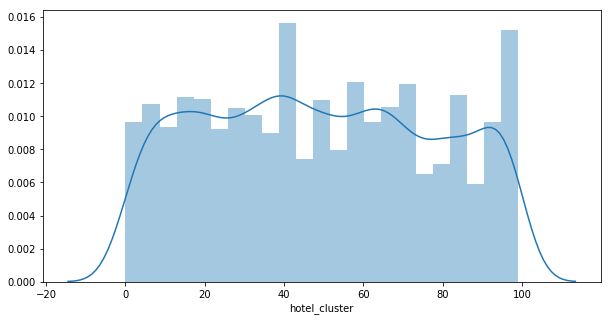

In [76]:
#Hotel Cluster
#The objective is to predict which hotel_cluster a user will book given the information in their search.
#There are 100 clusters in total.
sns.distplot(train['hotel_cluster'])
#Findings: The data is pretty much well distributed over all 100 clusters and there is skewness in the data.

In [77]:
## Create below set to findout is ther any pattern in booking by day of the month, week and year.
train['dow'] = train.date_time.dt.weekday
train['year'] = train.date_time.dt.year
train['month'] = train.date_time.dt.month
train['day'] = train.date_time.dt.day
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,dow,year,month,day
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,3,2,50,628,1,0,2014,8,11
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,1,1,2,50,628,1,0,2014,8,11
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,2,50,628,1,0,2014,8,11
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,2,50,1457,80,5,2014,8,9
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,2,50,1457,21,5,2014,8,9


In [78]:
train_temp = train[['dow','year','month','day','hotel_cluster', 'is_booking']]
train_agg = train_temp.groupby(['dow','year','month','day','hotel_cluster']).agg(['sum','count'])
#train_temp.head(10)
train_agg.head(10)

is_booking      
                                        sum count
dow year month day hotel_cluster                 
0   2013 1     7   3                      0     2
                   18                     0     2
                   31                     0     1
                   45                     0     1
                   48                     0     1
                   53                     0     1
                   65                     0     1
                   68                     0     1
                   74                     0     1
               14  24                     0     1

In [79]:
# Total number of Searches and booking by each day of the week.
date_agg_1 = train_agg.groupby(level=0).agg(['sum'])
date_agg_1.columns = ('bookings','total')
#date_agg_1['percentage_booking'] =  date_agg_1['bookings']/date_agg_1['total']
date_agg_1.head(10)

,bookings,total
dow,,
0,115,1560
1,134,1810
2,130,1720
3,134,1556
4,108,1258
5,74,1037
6,82,1059


Text(0,0.5,'Total Booking/Searches')

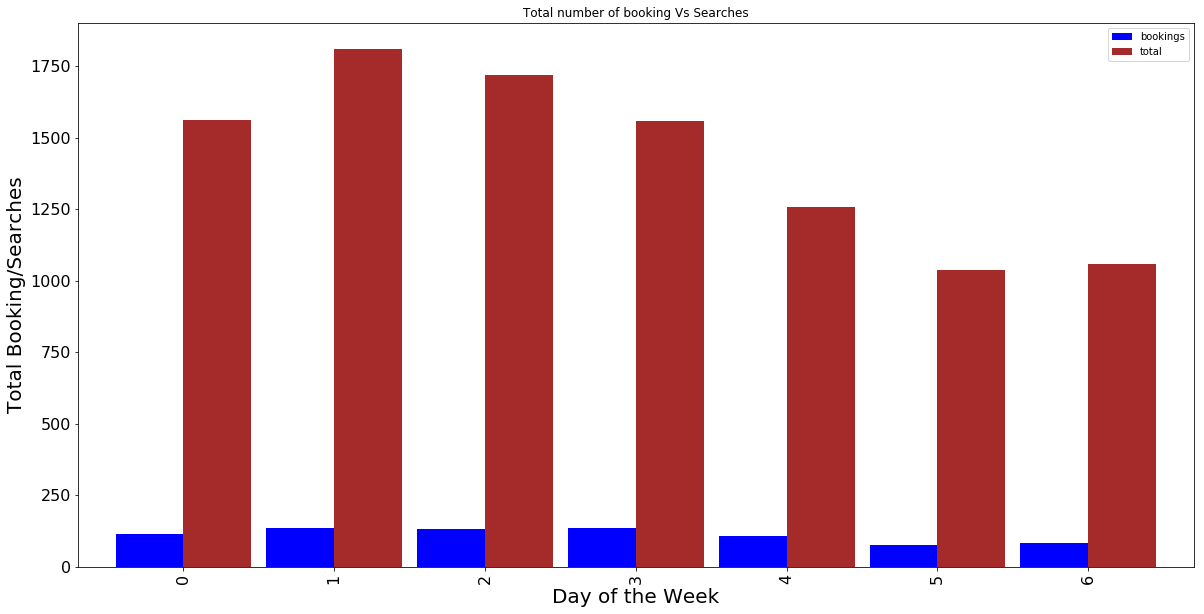

In [80]:
colors = [ 'Blue', 'Brown']
data_agg_1 = date_agg_1.plot( kind='bar', width= .9, figsize = (20,10), color = colors,
                        fontsize = 16, title = 'Total number of booking Vs Searches')
plt.legend(loc = 'best')
data_agg_1.set_xlabel('Day of the Week', fontsize = 20)
data_agg_1.set_ylabel('Total Booking/Searches', fontsize = 20)

#date_agg_1.plot(kind = 'bar', stacked = True)

In [81]:
# Total number of Search and booking by each year
date_agg_1 = train_agg.groupby(level=1).agg(['sum'])
date_agg_1.columns = ('bookings','total')
date_agg_1.head(2)

,bookings,total
year,,
2013,252,2388
2014,525,7612


Text(0,0.5,'Total Booking/Searches')

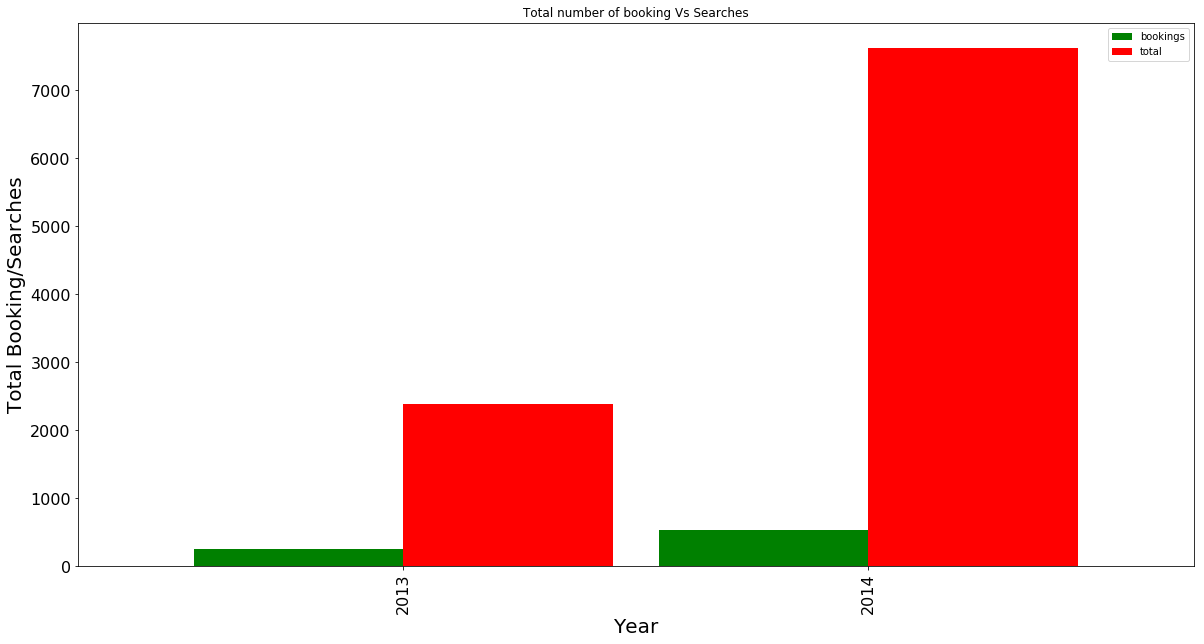

In [82]:
colors = [ 'Green', 'Red']
data_agg_1 = date_agg_1.plot( kind='bar', width= .9, figsize = (20,10), color = colors,
                        fontsize = 16, title = 'Total number of booking Vs Searches')
plt.legend(loc = 'best')
data_agg_1.set_xlabel('Year', fontsize = 20)
data_agg_1.set_ylabel('Total Booking/Searches', fontsize = 20)

In [83]:
# Search and booking total by each month of the year
date_agg_1 = train_agg.groupby(level=2).agg(['sum'])
date_agg_1.columns = ('bookings','total')
date_agg_1.head(12)

,bookings,total
month,,
1,44,520
2,62,552
3,60,729
4,55,647
5,63,693
6,54,665
7,69,1277
8,74,1016
9,92,944


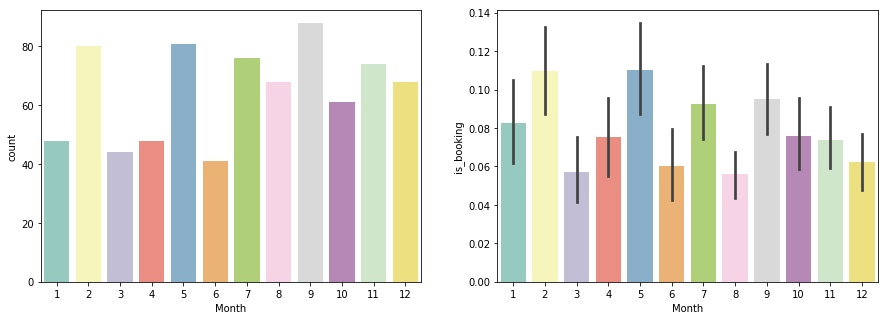

In [84]:
# Convert srch_ci to Year, Month, and Week

train['Year']   = train['srch_ci'].apply(lambda x: int(str(x)[:4]) if x == x else np.nan)
train['Month']  = train['srch_ci'].apply(lambda x: int(str(x)[5:7]) if x == x else np.nan)
train['Week']   = train['srch_ci'].apply(lambda x: int(str(x)[8:10]) if x == x else np.nan)

fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(15,5))

# Plot How many bookings in each month
sns.countplot('Month',data=train[train["is_booking"] == 1],order=list(range(1,13)),palette="Set3",ax=axis1)

# Plot The percentage of bookings of each month(sum of month bookings / count of bookings(=1 OR =0) of a month)
# sns.factorplot('Month',"is_booking",data=expedia_df, order=list(range(1,13)), palette="Set3",ax=axis2)
sns.barplot('Month',"is_booking",data=train, order=list(range(1,13)), palette="Set3",ax=axis2)

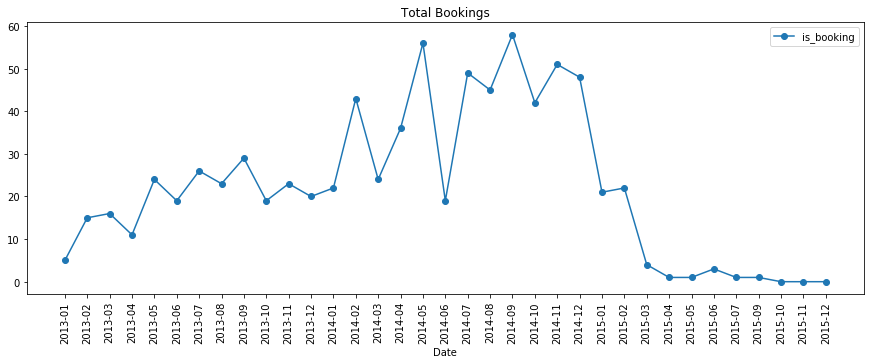

In [85]:
# Convert srch_ci column to Date(Y-M)
train['Date']  = train['srch_ci'].apply(lambda x: (str(x)[:7]) if x == x else np.nan)

# Plot number of bookings over Date
date_bookings  = train.groupby('Date')["is_booking"].sum()
ax1 = date_bookings.plot(legend=True,marker='o',title="Total Bookings", figsize=(15,5)) 
ax1.set_xticks(range(len(date_bookings)))
xlabels = ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)

In [86]:
# Correlation between hotel_country in number of bookings through 2013, 2014, & 2015

hotel_country_piv       = pd.pivot_table(train,values='is_booking', index='Date', 
                                         columns=['hotel_country'],aggfunc='sum')
hotel_country_piv       = hotel_country_piv.fillna(0)
hotel_country_piv.head()

hotel_country,0,1,5,7,8,9,11,12,13,15,...,182,185,186,193,196,198,200,203,204,208
Date,,,,,,,,,,,,,,,,,,,,,
2013-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2013-03,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2013-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2013-05,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


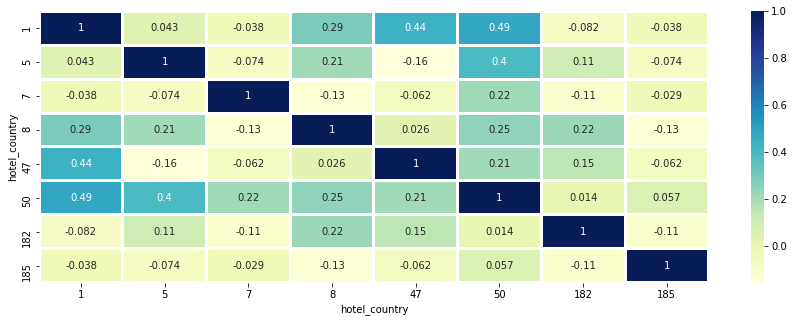

In [87]:
# Plot correlation between range of hotel_country
country_ids = [1,5,7,8,47,50,182,185]

fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

# using summation of booking values for each hotel_country 
sns.heatmap(hotel_country_piv[country_ids].corr(),annot=True,linewidths=2,cmap="YlGnBu")

In [88]:
# Group by srch_destination_id & hotel_cluster
# Then for each destination id & hotel cluster, compute summation of bookings, and count number of clicks(no-booking)
hotels_by_dest=train.groupby(['srch_destination_id','hotel_cluster'])['is_booking'].agg(['sum','count'])
hotels_by_dest.reset_index(inplace=True)
hotels_by_dest.head(10)

,srch_destination_id,hotel_cluster,sum,count
0,11,94,1,2
1,16,7,1,2
2,19,20,0,1
3,19,30,0,1
4,19,40,0,4
5,19,61,0,1
6,56,57,0,1
7,66,50,0,1
8,68,12,0,2
9,68,30,0,2


In [89]:
CLICK_WEIGHT = 0.05
agg = hotels_by_dest.groupby(['srch_destination_id','hotel_cluster']).sum().reset_index()
agg['count'] -= agg['sum']
agg = agg.rename(columns={'sum':'bookings','count':'clicks'})
agg['popularity'] = agg['bookings'] + CLICK_WEIGHT * agg['clicks']
agg.head(20)

,srch_destination_id,hotel_cluster,bookings,clicks,popularity
0,11,94,1,1,1.05
1,16,7,1,1,1.05
2,19,20,0,1,0.05
3,19,30,0,1,0.05
4,19,40,0,4,0.20
5,19,61,0,1,0.05
6,56,57,0,1,0.05
7,66,50,0,1,0.05
8,68,12,0,2,0.10
9,68,30,0,2,0.10


In [90]:
test_df  = test[['id', 'srch_destination_id']]
train_df = train.groupby(['srch_destination_id','hotel_cluster'])['is_booking'].agg(['sum','count'])
train_df['count'] = train_df['count'] - train_df['sum']
train_df.rename(columns={'sum': 'sum_bookings', 'count': 'clicks'}, inplace=True)

# For each destination id & hotel cluster, 
# the relevance will be the number of bookings made + number of clicks(no-bookings) * 0.1
# meaning for every 10 clicks, they will be counted as 1 booking

train_df['relevance'] = train_df['sum_bookings'] + (train_df['clicks'] * 0.1)

In [91]:
# For each srch_destination_id group, get top 5 hotel clusters with max relevance

def get_top_clusters(group):
    indexes      = group.relevance.nlargest(5).index
    top_clusters = group.hotel_cluster[indexes].values
    if(len(top_clusters) < 5):
        top_clusters = (list(top_clusters) + list(ferq_clusters.index))[:5]
    return np.array_str(np.array(top_clusters))[1:-1]

train_df      = train_df.reset_index()
ferq_clusters = train_df['hotel_cluster'].value_counts()[:5]
top_clusters  = train_df.groupby(['srch_destination_id']).apply(get_top_clusters)

In [92]:
# Create top_clusters_df

top_clusters_df = pd.DataFrame(top_clusters).rename(columns={0: 'hotel_cluster'})
top_clusters_df.head()

,hotel_cluster
srch_destination_id,
11,94 91 48 41 30
16,7 91 48 41 30
19,40 20 30 61 91
56,57 91 48 41 30
66,50 91 48 41 30


In [93]:
# Merge test_df with top_clusters_df

# For every destination id in test_df, merge it with the corresponding id in top_clusters_df 
test_df = pd.merge(test_df, top_clusters_df, how='left',left_on='srch_destination_id', right_index=True)

# Fill NaN values with most frequent clusters
test_df.hotel_cluster.fillna(np.array_str(ferq_clusters.index)[1:-1],inplace=True)

Y_pred = test_df["hotel_cluster"]

In [94]:
# Create submission

submission = pd.DataFrame()
submission["id"]            = test_df["id"]
submission["hotel_cluster"] = Y_pred

submission.to_csv('my_expedia.csv', index=False)

In [ ]:
# Conclusion
# In EDA part, I was trying to find some pattern in train and test data set, but I couldn’t find any.
# Then I want to know if anything correlates well with hotel_cluster, but no column correlates 
# linearly with hotel_cluster.
# I used the combination of Search Destination ID, Hotel cluster and is_booking column to find out the sum of 
# each hotel cluster searched or booked for the given Destination ID. This helps me to find the popularity 
# of each hotel cluster.
# Then I defined my own function to create top five hotel cluster with maximum relevance for each Destination ID.
# Finally, I merge the top five hotel cluster with each destination ID and created my own sample for 
# expedia hotel recomentaion.
